****

**Outline**
- Non-parametric VS. Parametric model
- KNN
  - Algorithm
  - choose a right K
  - Advantages & Disadvantages

****

# Non-parametric VS. Parametric model

|Parametric modeling|Non-Parametric modeling|
| ----------------| ------------------------ |
|use discrete values|use continuous values|
|can infer the traditional measurements associated with normal distributions including mean, median, and mode|normally oriented, often one cannot assume the data comes from a normal distribution|
|feeding related features is really important|algorithm can ignore unimportant features. It would not cause overfitting|
|can predict future values using only the parameters|slower and require large amounts of data to predict, but also more flexible|

# KNN

KNN is a non-parametric model. It assumes that similar data exist in close proximity. In other words, similar things are near to each other.

## Algorithm

- Load the data
- Initialize K to your chosen number of neighbors
- For each example in the data
  - Calculate the distance between the query example and the current example from the data.
  -Add the distance and the index of the example to an ordered collection.
- Sort the ordered collection of distances and indices from smallest to - largest (in ascending order) by the distances
- Pick the first K entries from the sorted collection
- Get the labels of the selected K entries
- If regression, return the mean of the K labels
- If classification, return the mode of the K labels

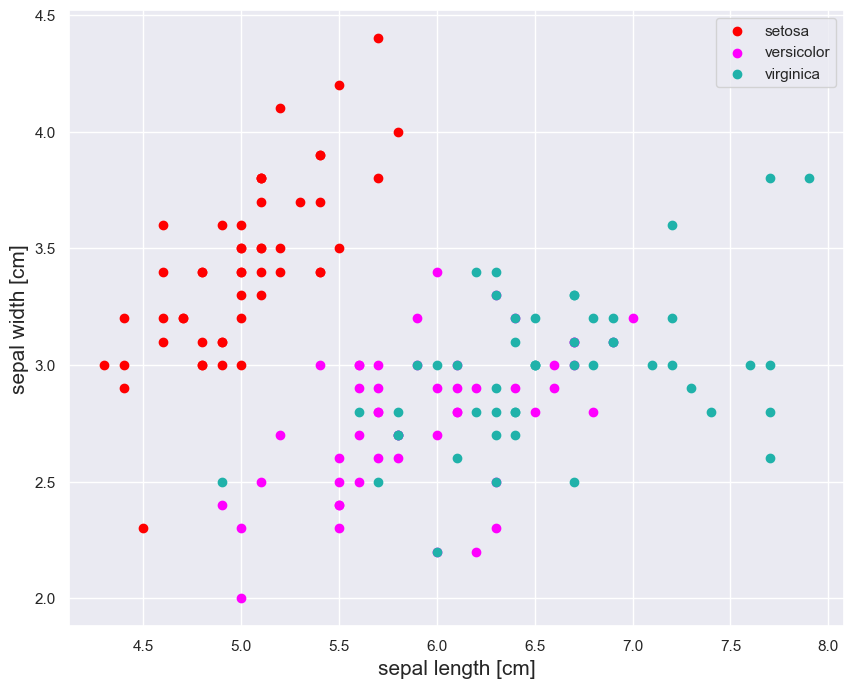

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Set theme for plotting
sns.set_theme()

# Import the data
iris = sns.load_dataset("iris")

# Plot the data
flowers = ["setosa", "versicolor", "virginica"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(flowers, colors):
    temp_df = iris[iris.species == species]
    ax.scatter(temp_df.sepal_length,
               temp_df.sepal_width,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("sepal length [cm]", fontsize = 15)
ax.set_ylabel("sepal width [cm]", fontsize = 15)
ax.legend()
plt.show()


In [6]:
from scipy.spatial.distance import euclidean
# compute the KNN
def knn(X_train, y_train, X_test, k):
    """
    K-Nearest Neighbors Algorithm
    
    Parameters:
    X_train (ndarray): Training data (features)
    y_train (ndarray): Training labels
    X_test (ndarray): Testing data (features)
    k (int): Number of nearest neighbors to consider
    
    Returns:
    y_pred (ndarray): Predicted labels for the testing data
    """
    # Initialize predicted labels array
    y_pred = np.zeros(X_test.shape[0])
    
    # Loop over testing data points
    for i in range(X_test.shape[0]):
        # Calculate distances between testing data point and all training data points
        distances = np.array([euclidean(X_test[i], X_train[j]) for j in range(X_train.shape[0])])
        
        # Get indices of k nearest neighbors
        nearest_neighbors_idx = np.argsort(distances)[:k]
        
        # Get labels of k nearest neighbors
        nearest_neighbors_labels = y_train[nearest_neighbors_idx]
        
        # Choose the most common label among the k nearest neighbors
        y_pred[i] = np.bincount(nearest_neighbors_labels).argmax()
    
    return y_pred


In [17]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred=knn(X_train, y_train, X_test, k=1)
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Choose a right K

There are no pre-defined statistical methods to find the most favorable value of K. When we decrease the value of K, the result become less stable. The substantial K value is better for classification as it leads to smoothening the decision boundaries.

## Advantages & Disadvantages

**Advantages**
- KNN is a simple, easy-to-understand algorithm that can be applied to a wide range of problems.
- KNN is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution.
- KNN can be used for both classification and regression problems.
- KNN can be effective when the decision boundary is irregular or there are many classes.
- KNN can be robust to noisy or irrelevant features in the data.

**Disadvantages**
- KNN can be computationally expensive when the dataset is large or the number of features is high, as it requires computing distances between all pairs of data points.
- KNN can be sensitive to the choice of distance metric used to calculate distances between data points.
- KNN can be sensitive to the value of k chosen, as a value that is too small or too large can result in overfitting or underfitting the data.
KNN can struggle with imbalanced datasets, as it can be biased towards the majority class.
- KNN doesn't provide any information on the relationship between the features and the target variable, so it may not be as useful for gaining insights into the data as other algorithms.